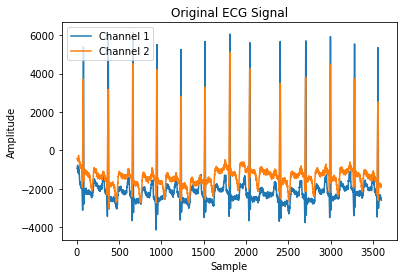

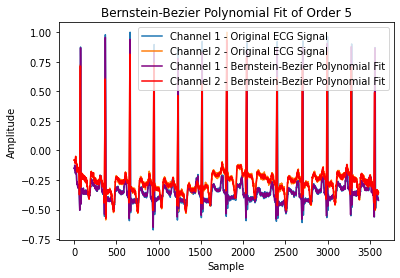

RMSE of Bernstein-Bezier polynomial fit of order 5: 0.09874081106219385


In [17]:
#Bernstein-Bezier Curve


import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

# Load ECG wave file
fs, ecg = wav.read('C:\\Users\\pooja\\Desktop\\Cryptography\\sig100.wav')

# Extract the first 10 seconds of the signal from both channels
ecg_10s = ecg[:10*fs, :]

# Define the order of the Bernstein-Bezier polynomial
orders = [5, 10, 25, 100, 1000]

# Plot the original ECG signal
plt.figure()
plt.plot(ecg_10s[:, 0], label='Channel 1')
plt.plot(ecg_10s[:, 1], label='Channel 2')
plt.title('Original ECG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Normalize the ECG signal to be between -1 and 1 for both channels
ecg_norm = ecg_10s / np.max(np.abs(ecg_10s), axis=0)

# Fit the normalized ECG signal using Bernstein-Bezier polynomial of different orders for both channels
for i, order in enumerate(orders):
    # Define the Bernstein-Bezier polynomial basis
    t = np.linspace(0, 1, len(ecg_norm))
    control_points = np.zeros((len(ecg_norm), 2, 2))
    control_points[:, :, 0] = t.reshape(-1, 1)
    control_points[:, :, 1] = ecg_norm
    for j in range(1, order):
        for k in range(len(control_points) - j):
            control_points[k] = (1 - t[k]) * control_points[k] + t[k] * control_points[k + 1]
    y_fit = control_points[:, :, 1]

    # Plot the fitted signal using the Bernstein-Bezier polynomial for both channels
    plt.figure()
    plt.plot(ecg_norm[:, 0], label='Channel 1 - Original ECG Signal')
    plt.plot(ecg_norm[:, 1], label='Channel 2 - Original ECG Signal')
    plt.plot(y_fit[:, 0], label='Channel 1 - Bernstein-Bezier Polynomial Fit',color='purple')
    plt.plot(y_fit[:, 1], label='Channel 2 - Bernstein-Bezier Polynomial Fit',color='red')
    plt.title(f'Bernstein-Bezier Polynomial Fit of Order {order}')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.savefig('bezier_ecg.png')
    plt.show()

    # Compute the root-mean-square error (RMSE) between the original signal and the fitted signal
    rmse = np.sqrt(np.mean((ecg_norm - y_fit)**2))
    print(f"RMSE of Bernstein-Bezier polynomial fit of order {order}: {rmse}")

    # Stop fitting when the RMSE is below a threshold value
    if rmse < 0.1:
        break


In [22]:
bezier_coeffs=y_fit
print(bezier_coeffs)

[[-0.151089358400694 -0.06769196563511387]
 [-0.15028488195040032 -0.06792151181819035]
 [-0.1557102667256126 -0.06649572228255307]
 ...
 [-0.4053901612020357 -0.3085694531798159]
 [-0.4168857898304797 -0.30188467893519977]
 [-0.4218632658776013 -0.29689729074667076]]


In [23]:
print(len(bezier_coeffs))

3600


In [24]:
np.savetxt('bezier_coefficients.txt', bezier_coeffs)

In [7]:
print(y_fit)

[[-0.151089358400694 -0.06769196563511387]
 [-0.15028488195040032 -0.06792151181819035]
 [-0.1557102667256126 -0.06649572228255307]
 ...
 [-0.4053901612020357 -0.3085694531798159]
 [-0.4168857898304797 -0.30188467893519977]
 [-0.4218632658776013 -0.29689729074667076]]


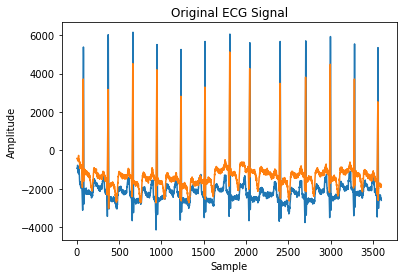

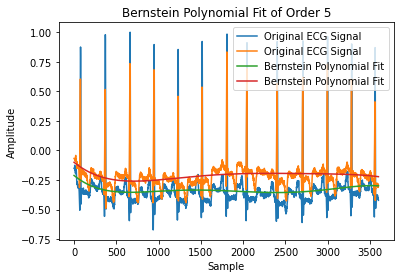

RMSE of Bernstein polynomial fit of order 5: 0.1522495897190059


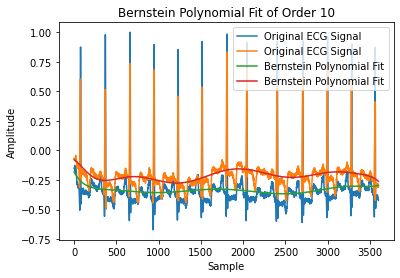

RMSE of Bernstein polynomial fit of order 10: 0.1511022567300663


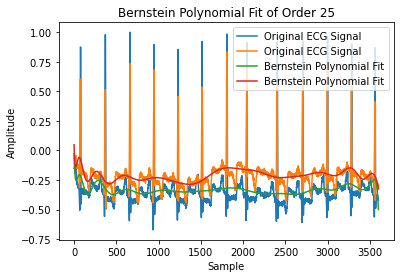

RMSE of Bernstein polynomial fit of order 25: 0.14946334078575474


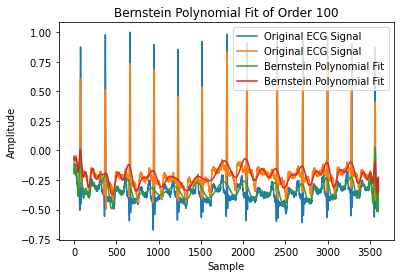

RMSE of Bernstein polynomial fit of order 100: 0.14026215780112725


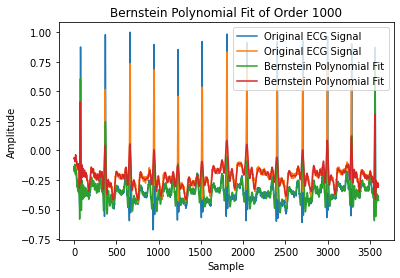

RMSE of Bernstein polynomial fit of order 1000: 0.11352905941821252


In [2]:
#Bernstein


import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

# Load ECG wave file
fs, ecg = wav.read('C:\\Users\\pooja\\Desktop\\Cryptography\\sig100.wav')

# Extract the first 10 seconds of the signal
ecg_10s = ecg[:10*fs]

# Define the order of the Bernstein polynomial
orders = [5,10,25,100,1000]

# Plot the original ECG signal
plt.figure()
plt.plot(ecg_10s)
plt.title('Original ECG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

# Normalize the ECG signal to be between -1 and 1
ecg_norm = ecg_10s / np.max(np.abs(ecg_10s))

# Fit the normalized ECG signal using Bernstein polynomial of different orders
for i, order in enumerate(orders):
    # Define the Bernstein polynomial basis
    t = np.linspace(0, 1, len(ecg_norm))
    B = np.array([np.math.comb(order, j) * t**j * (1 - t)**(order - j) for j in range(order+1)])

    # Compute the coefficients of the Bernstein polynomial
    coeffs = np.linalg.lstsq(np.asarray(B.T, dtype=np.float64), np.asarray(ecg_norm, dtype=np.float64), rcond=None)[0]

    # Evaluate the Bernstein polynomial on the signal domain
    y_fit = np.dot(B.T, coeffs)

    # Plot the fitted signal using the Bernstein polynomial
    plt.figure()
    plt.plot(ecg_norm, label='Original ECG Signal')
    plt.plot(y_fit, label='Bernstein Polynomial Fit')
    plt.title(f'Bernstein Polynomial Fit of Order {order}')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

    # Compute the root-mean-square error (RMSE) between the original signal and the fitted signal
    rmse = np.sqrt(np.mean((ecg_norm - y_fit)**2))
    print(f"RMSE of Bernstein polynomial fit of order {order}: {rmse}")
    
    # Stop fitting when the RMSE is below a threshold value
    if rmse < 0.1:
        break


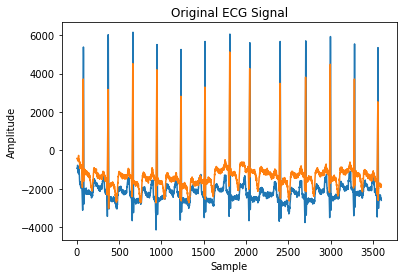

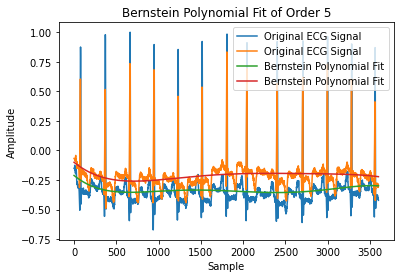

RMSE of Bernstein polynomial fit of order 5: 0.1522495897190059


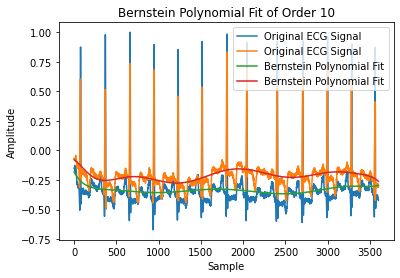

RMSE of Bernstein polynomial fit of order 10: 0.15110225673006633


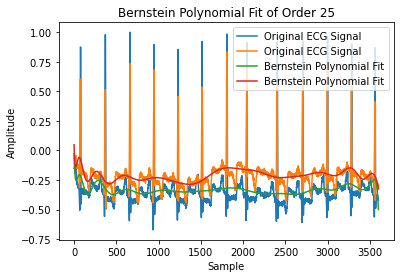

RMSE of Bernstein polynomial fit of order 25: 0.149463340785725


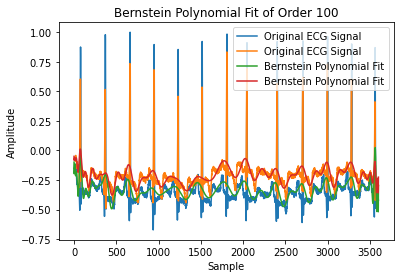

RMSE of Bernstein polynomial fit of order 100: 0.1402621580789655


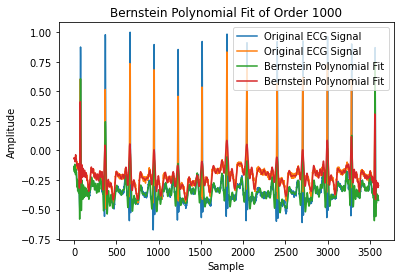

RMSE of Bernstein polynomial fit of order 1000: 0.11352906076321949


In [13]:
#Bernstein


import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

# Load ECG wave file
fs, ecg = wav.read('C:\\Users\\pooja\\Desktop\\Cryptography\\sig100.wav')

# Extract the first 10 seconds of the signal
ecg_10s = ecg[:10*fs]

# Define the order of the Bernstein polynomial
orders = [5,10,25,100,1000]

# Plot the original ECG signal
plt.figure()
plt.plot(ecg_10s)
plt.title('Original ECG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.savefig("OGecg.png")
plt.show()

# Normalize the ECG signal to be between -1 and 1
ecg_norm = ecg_10s / np.max(np.abs(ecg_10s))

# Fit the normalized ECG signal using Bernstein polynomial of different orders
for i, order in enumerate(orders):
    # Define the Bernstein polynomial basis
    t = np.linspace(0, 1, len(ecg_norm))
    B = np.array([np.math.comb(order, j) * t**j * (1 - t)**(order - j) for j in range(order+1)])

    # Compute the coefficients of the Bernstein polynomial
    coeffs = np.linalg.lstsq(np.asarray(B.T, dtype=np.float64), np.asarray(ecg_norm, dtype=np.float64), rcond=None)[0]

    # Evaluate the Bernstein polynomial on the signal domain
    y_fit = np.dot(B.T, coeffs)
    
    # Plot the fitted signal using the Bernstein polynomial
    plt.figure()
    plt.plot(ecg_norm, label='Original ECG Signal')
    plt.plot(y_fit, label='Bernstein Polynomial Fit')
    plt.title(f'Bernstein Polynomial Fit of Order {order}')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.savefig("ecg"+str(i)+ ".png")
    plt.show()
    

    # Compute the root-mean-square error (RMSE) between the original signal and the fitted signal
    rmse = np.sqrt(np.mean((ecg_norm - y_fit)**2))
    print(f"RMSE of Bernstein polynomial fit of order {order}: {rmse}")
    
    # Stop fitting when the RMSE is below a threshold value
    if rmse < 0.1:
        break


In [1]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

# Load ECG wave file
fs, ecg = wav.read('C:\\Users\\pooja\\Desktop\\Cryptography\\sig100.wav')

# Extract the first 10 seconds of the signal
ecg_10s = ecg[:10*fs]

# Define the order of the Bernstein polynomial
orders = [5,10,25,100,1000]

# Normalize the ECG signal to be between -1 and 1
ecg_norm = ecg_10s / np.max(np.abs(ecg_10s))

# Initialize variables to keep track of the minimum RMSE and corresponding coefficients
min_rmse = np.inf
min_coeffs = None

# Fit the normalized ECG signal using Bernstein polynomial of different orders
for i, order in enumerate(orders):
    # Define the Bernstein polynomial basis
    t = np.linspace(0, 1, len(ecg_norm))
    B = np.array([np.math.comb(order, j) * t**j * (1 - t)**(order - j) for j in range(order+1)])

    # Compute the coefficients of the Bernstein polynomial
    coeffs = np.linalg.lstsq(np.asarray(B.T, dtype=np.float64), np.asarray(ecg_norm, dtype=np.float64), rcond=None)[0]

    # Evaluate the Bernstein polynomial on the signal domain
    y_fit = np.dot(B.T, coeffs)

    # Compute the root-mean-square error (RMSE) between the original signal and the fitted signal
    rmse = np.sqrt(np.mean((ecg_norm - y_fit)**2))
    print(f"RMSE of Bernstein polynomial fit of order {order}: {rmse}")
    
    # Update the minimum RMSE and corresponding coefficients if the current RMSE is lower
    if rmse < min_rmse:
        min_rmse = rmse
        min_coeffs = coeffs
    
    # Stop fitting when the RMSE is below a threshold value
    if rmse < 0.1:
        break
        
with open('bernstein_coeffs.txt', 'w') as f:
    for i in range(len(min_coeffs)):
        f.write(f"{min_coeffs[i][0]} {min_coeffs[i][1]}\n")



RMSE of Bernstein polynomial fit of order 5: 0.1522495897190059
RMSE of Bernstein polynomial fit of order 10: 0.15110225673006633
RMSE of Bernstein polynomial fit of order 25: 0.149463340785725
RMSE of Bernstein polynomial fit of order 100: 0.1402621580789655
RMSE of Bernstein polynomial fit of order 1000: 0.11352906076321949


ENCRYPTION OF THE WAVEFORM

In [5]:
from cryptography.fernet import Fernet
import numpy as np
from sklearn.metrics import mean_squared_error

# Generate a new Fernet key
key = Fernet.generate_key()

# Create a Fernet instance with the key
fernet = Fernet(key)

# Read the coefficients from file
with open('bernstein_coeffs.txt', 'r') as f:
    coeffs = np.array([float(c) for c in f.read().split()])

# Encrypt the coefficients
encrypted_coeffs = fernet.encrypt(coeffs.tobytes())

# Save the encrypted data to file
with open('encrypted_coeffs.txt', 'wb') as f:
    f.write(encrypted_coeffs)

# Save the key to file
with open('key.txt', 'wb') as f:
    f.write(key)

# Print the key
print(f'The encryption key is: {key}')

# --- Decryption ---
# Read the encrypted data from file
with open('encrypted_coeffs.txt', 'rb') as f:
    encrypted_data = f.read()

# Read the key from file
with open('key.txt', 'rb') as f:
    key = f.read()

# Create a Fernet instance with the key
fernet = Fernet(key)

# Decrypt the data
decrypted_data = fernet.decrypt(encrypted_data)

# Convert the decrypted data back to a numpy array
coeffs_decrypted = np.frombuffer(decrypted_data, dtype=np.float64)

# Calculate the RMSE between the original and decrypted coefficients
rmse = mean_squared_error(coeffs, coeffs_decrypted, squared=False)

# Print the coefficients and RMSE
print(f'Original coefficients: {coeffs}')
print(f'Decrypted coefficients: {coeffs_decrypted}')
print(f'RMSE: {rmse}')


The encryption key is: b'AT4G1Met9PfP4lF97P0xLY21FGdEMbCXZhoMeYA3MZ8='
Original coefficients: [-0.15108936 -0.06769197 56.09538354 ... 14.38863525 -0.42186327
 -0.29689729]
Decrypted coefficients: [-0.15108936 -0.06769197 56.09538354 ... 14.38863525 -0.42186327
 -0.29689729]
RMSE: 0.0


CHANGING COEFFICIENTS BACK TO ECG SIGNAL AND COMPUTING RMSE

In [6]:
d_list=[]
for i in range(0,len(coeffs_decrypted),2):
    row = coeffs_decrypted[i:i+2]
    d_list.append(row)

In [7]:
import numpy as np
from scipy.special import comb
from scipy.io import wavfile as wav

# Load the ECG signal
fs, ecg = wav.read('sig100.wav')

# Extract the first 10 seconds of the signal
ecg_10s = ecg[:10*fs, :]

# Define the order of the Bernstein polynomial to be the same as the order used to fit the signal
order = 1000

# Define the Bernstein polynomial basis
t = np.linspace(0, 1, len(ecg_10s))
B = np.array([comb(order, j) * t**j * (1 - t)**(order - j) for j in range(order+1)])

# Compute the reconstructed signal
y_rec = np.dot(B.T, d_list)

# Rescale the reconstructed signal to the original amplitude range
y_dec = y_rec * np.max(np.abs(ecg_10s))

# Reshape the reconstructed signal to a 2D array with 2 columns to represent the two channels of the ECG signal
y_dec = y_dec.reshape((-1, 2))

In [8]:
print(y_dec)

[[ -928.29301801  -415.89943686]
 [ -923.3503147   -417.30976861]
 [ -956.68387876  -408.5497177 ]
 ...
 [-2490.71715043 -1895.85072034]
 [-2561.34629272 -1854.77946738]
 [-2591.92790555 -1824.13695435]]


In [9]:
print(ecg_10s)

[[ -928  -416]
 [ -928  -416]
 [ -928  -416]
 ...
 [-2496 -1888]
 [-2560 -1856]
 [-2592 -1824]]


In [5]:
og_list=[]
dec_list=[]
for i in range(len(ecg_10s)):
    avg1=(ecg_10s[0]+ecg_10s[1])/2
    avg2=(y_dec[0]+y_dec[1])/2
    og_list.append(avg1)
    dec_list.append(avg2)

In [6]:
rmse = np.sqrt(mean_squared_error(og_list, dec_list))
print(rmse)

1.598543387328857


ENCRYPTION AND DECRYPTION OF THE BERNSTEIN-BEZIER CURVE

In [120]:
from cryptography.fernet import Fernet
import numpy as np
from sklearn.metrics import mean_squared_error

# Generate a new Fernet key
key = Fernet.generate_key()

# Create a Fernet instance with the key
fernet = Fernet(key)

# Read the coefficients from file
with open('bezier_coefficients.txt', 'r') as f:
    coeffs = np.array([float(c) for c in f.read().split()])

# Encrypt the coefficients
encrypted_coeffs = fernet.encrypt(coeffs.tobytes())

# Save the encrypted data to file
with open('bezier_encrypted_coeffs.txt', 'wb') as f:
    f.write(encrypted_coeffs)

# Save the key to file
with open('bezier_key.txt', 'wb') as f:
    f.write(key)

# Print the key
print(f'The encryption key is: {key}')

# --- Decryption ---
# Read the encrypted data from file
with open('bezier_encrypted_coeffs.txt', 'rb') as f:
    encrypted_data = f.read()

# Read the key from file
with open('bezier_key.txt', 'rb') as f:
    key = f.read()

# Create a Fernet instance with the key
fernet = Fernet(key)

# Decrypt the data
decrypted_data = fernet.decrypt(encrypted_data)

# Convert the decrypted data back to a numpy array
coeffs_decrypted = np.frombuffer(decrypted_data, dtype=np.float64)

# Calculate the RMSE between the original and decrypted coefficients
rmse = mean_squared_error(coeffs, coeffs_decrypted, squared=False)

# Print the coefficients and RMSE
print(f'Original coefficients: {coeffs}')
print(f'Decrypted coefficients: {coeffs_decrypted}')
print(f'RMSE: {rmse}')


The encryption key is: b'sM2c-Z0e0rY2zAhcDChdELTO7P-XJStWxLgr_ZCA_yc='
Original coefficients: [-0.15108936 -0.06769197 -0.15028488 ... -0.30188468 -0.42186327
 -0.29689729]
Decrypted coefficients: [-0.15108936 -0.06769197 -0.15028488 ... -0.30188468 -0.42186327
 -0.29689729]
RMSE: 0.0


In [164]:
print(coeffs)

[-0.15108936 -0.06769197 -0.15028488 ... -0.30188468 -0.42186327
 -0.29689729]


In [165]:
print(coeffs_decrypted)

[-0.15108936 -0.06769197 -0.15028488 ... -0.30188468 -0.42186327
 -0.29689729]


In [121]:
bezier_d_list=[]
for i in range(0,len(coeffs_decrypted),2):
    row = coeffs_decrypted[i:i+2]
    bezier_d_list.append(row)

In [122]:
print(bezier_d_list)

[array([-0.15108936, -0.06769197]), array([-0.15028488, -0.06792151]), array([-0.15571027, -0.06649572]), array([-0.13560909, -0.07133485]), array([-0.17921637, -0.06217489]), array([-0.12851802, -0.07013922]), array([-0.14429399, -0.07124678]), array([-0.1672686 , -0.06706363]), array([-0.14177178, -0.07413866]), array([-0.11673485, -0.08882831]), array([-0.13369555, -0.09486659]), array([-0.16985545, -0.08688337]), array([-0.18479658, -0.07456134]), array([-0.17158894, -0.0689674 ]), array([-0.15480852, -0.07099268]), array([-0.15733614, -0.07266522]), array([-0.17859612, -0.06659924]), array([-0.20004373, -0.05321648]), array([-0.20471349, -0.04020481]), array([-0.19081184, -0.03622085]), array([-0.17047141, -0.04458536]), array([-0.15848437, -0.06136247]), array([-0.16152134, -0.07832402]), array([-0.17510742, -0.08812663]), array([-0.18863859, -0.08827481]), array([-0.19355102, -0.08184802]), array([-0.18894361, -0.07515371]), array([-0.18167766, -0.07405672]), array([-0.18173352,

In [128]:
print(coeffs)

[-0.15108936 -0.06769197 -0.15028488 ... -0.30188468 -0.42186327
 -0.29689729]


In [151]:
coeffs_list=[]
for i in range(0,len(coeffs),2):
    row = coeffs[i:i+2]
    coeffs_list.append(row)

TRIAL RUN ON ORIGINAL COEFFICIENTS GENERATED

In [154]:

order = 5

t = np.linspace(0, 1, len(coeffs_list))
control_points = np.zeros((len(coeffs_list), 2, 2))
control_points[:, :, 0] = t.reshape(-1, 1)
control_points[:, :, 1] = coeffs_list
for j in range(1, order):
    for k in range(len(control_points) - j):
        control_points[k] = (1 - t[k]) * control_points[k] + t[k] * control_points[k + 1]

y_recon = control_points[:, :, 1]



In [163]:
print(coeffs_list)

[array([-0.15108936, -0.06769197]), array([-0.15028488, -0.06792151]), array([-0.15571027, -0.06649572]), array([-0.13560909, -0.07133485]), array([-0.17921637, -0.06217489]), array([-0.12851802, -0.07013922]), array([-0.14429399, -0.07124678]), array([-0.1672686 , -0.06706363]), array([-0.14177178, -0.07413866]), array([-0.11673485, -0.08882831]), array([-0.13369555, -0.09486659]), array([-0.16985545, -0.08688337]), array([-0.18479658, -0.07456134]), array([-0.17158894, -0.0689674 ]), array([-0.15480852, -0.07099268]), array([-0.15733614, -0.07266522]), array([-0.17859612, -0.06659924]), array([-0.20004373, -0.05321648]), array([-0.20471349, -0.04020481]), array([-0.19081184, -0.03622085]), array([-0.17047141, -0.04458536]), array([-0.15848437, -0.06136247]), array([-0.16152134, -0.07832402]), array([-0.17510742, -0.08812663]), array([-0.18863859, -0.08827481]), array([-0.19355102, -0.08184802]), array([-0.18894361, -0.07515371]), array([-0.18167766, -0.07405672]), array([-0.18173352,

In [161]:
order =5
t = np.linspace(0, 1, len(ecg_norm))
control_points = np.zeros((len(ecg_norm), 2, 2))
control_points[:, :, 0] = t.reshape(-1, 1)
control_points[:, :, 1] = ecg_norm
for j in range(1, order):
    for k in range(len(control_points) - j):
        control_points[k] = (1 - t[k]) * control_points[k] + t[k] * control_points[k + 1]
y_fit = control_points[:, :, 1]

In [162]:
print(y_fit)

[[-0.15104167 -0.08125   ]
 [-0.15104167 -0.08125   ]
 [-0.15104167 -0.08125   ]
 ...
 [-0.42187066 -0.35625521]
 [-0.42187355 -0.35625174]
 [-0.421875   -0.35625   ]]


In [156]:
print(y_recon)

[[-0.15108936 -0.06769197]
 [-0.15029089 -0.06791993]
 [-0.15566574 -0.06650644]
 ...
 [-0.42185911 -0.29690145]
 [-0.42186188 -0.29689868]
 [-0.42186327 -0.29689729]]


In [160]:
print(ecg_norm)

[[-0.15104167 -0.08125   ]
 [-0.15104167 -0.08125   ]
 [-0.15104167 -0.08125   ]
 ...
 [-0.40625    -0.36875   ]
 [-0.41666667 -0.3625    ]
 [-0.421875   -0.35625   ]]


In [157]:
y_recon *= np.max(np.abs(ecg_10s), axis=0)

In [159]:
np.max(np.abs(ecg_10s), axis=0)

array([6144, 5120], dtype=int16)

In [158]:
print (y_recon)

[[ -928.29301801  -346.58286405]
 [ -923.38723263  -347.75005339]
 [ -956.41032644  -340.51299584]
 ...
 [-2591.9023967  -1520.13542069]
 [-2591.9194083  -1520.12122377]
 [-2591.92790555 -1520.11412862]]


In [130]:
print(ecg_10s)

[[ -928  -416]
 [ -928  -416]
 [ -928  -416]
 ...
 [-2496 -1888]
 [-2560 -1856]
 [-2592 -1824]]


In [104]:
type(y_recon)

numpy.ndarray

In [106]:
y_recon.tolist()

[[-928.0, -416.0],
 [-928.0, -416.0],
 [-928.0, -416.0],
 [-928.0, -416.0],
 [-927.999999999199, -416.0000000004806],
 [-927.9999971215061, -416.0000017276735],
 [-927.9968974154972, -416.00186321019066],
 [-926.7613228430537, -416.7446993491318],
 [-768.8528584056364, -512.0010638986405],
 [-864.6391153009151, -512.3188848194943],
 [-928.3574195737244, -543.9967479847523],
 [-960.7769160898687, -543.2191919867369],
 [-1023.5776642090075, -479.57533856714144],
 [-992.4679120305475, -447.99730072236486],
 [-1025.4881602000046, -447.49878021821644],
 [-1120.5336591919527, -414.93615164781147],
 [-1152.5532015784006, -351.43470971745023],
 [-1182.1855181244403, -319.9909870678893],
 [-1086.1139845219689, -318.7292739243063],
 [-994.6872795210854, -256.01686375982626],
 [-1120.7177076891203, -258.1409435366667],
 [-1153.4669920624165, -354.96827295500384],
 [-1214.4120882456634, -480.7826330526108],
 [-1147.916721428167, -512.7859385842316],
 [-988.655270737926, -541.4824160165899],
 [-867

CONVERTING THE ACTUAL DECRYPTED COEFFICIENTS INTO THE ORIGINAL ECG SIGNAL

In [141]:
print(bezier)

[array([-0.15108936, -0.06769197]), array([-0.15028488, -0.06792151]), array([-0.15571027, -0.06649572]), array([-0.13560909, -0.07133485]), array([-0.17921637, -0.06217489]), array([-0.12851802, -0.07013922]), array([-0.14429399, -0.07124678]), array([-0.1672686 , -0.06706363]), array([-0.14177178, -0.07413866]), array([-0.11673485, -0.08882831]), array([-0.13369555, -0.09486659]), array([-0.16985545, -0.08688337]), array([-0.18479658, -0.07456134]), array([-0.17158894, -0.0689674 ]), array([-0.15480852, -0.07099268]), array([-0.15733614, -0.07266522]), array([-0.17859612, -0.06659924]), array([-0.20004373, -0.05321648]), array([-0.20471349, -0.04020481]), array([-0.19081184, -0.03622085]), array([-0.17047141, -0.04458536]), array([-0.15848437, -0.06136247]), array([-0.16152134, -0.07832402]), array([-0.17510742, -0.08812663]), array([-0.18863859, -0.08827481]), array([-0.19355102, -0.08184802]), array([-0.18894361, -0.07515371]), array([-0.18167766, -0.07405672]), array([-0.18173352,

In [138]:
# Define the order of the Bernstein-Bezier polynomial
order = 5

# Define the Bernstein-Bezier polynomial basis
t = np.linspace(0, 1, len(bezier_d_list))
control_points = np.zeros((len(bezier_d_list), 2, 2))
control_points[:, :, 0] = t.reshape(-1, 1)
control_points[:, :, 1] = bezier_d_list
for j in range(1, order):
    for k in range(len(control_points) - j):
        control_points[k] = (1 - t[k]) * control_points[k] + t[k] * control_points[k + 1]

# Reconstruct the original ECG signal using the coefficients of the Bernstein-Bezier polynomial
y_recon = control_points[:, :, 1]

In [169]:
# Define the order of the Bernstein-Bezier polynomial
order = 5

# Define the Bernstein-Bezier polynomial basis
t = np.linspace(0, 1, len(bezier_d_list))
control_points = np.zeros((len(bezier_d_list), 2, 2))
control_points[:, :, 0] = t.reshape(-1, 1)
control_points[:, :, 1] = bezier_d_list
control_points_copy = np.copy(control_points)  # create a copy of the control_points array
for j in range(1, order):
    for k in range(len(control_points) - j):
        control_points_copy[k] = (1 - t[k]) * control_points_copy[k] + t[k] * control_points_copy[k + 1]

# Reconstruct the original ECG signal using the coefficients of the Bernstein-Bezier polynomial
y_recon = np.zeros((2, len(bezier_d_list)))  # <-- changed shape here
for i in range(2):
    y_recon[i, :] = control_points_copy[:, i, 1].squeeze()  # <-- changed indexing here

y_recon = y_recon.T  # <-- transpose to match the original shape of the ECG signal


In [170]:
print(y_recon)

[[-0.15108936 -0.06769197]
 [-0.15029089 -0.06791993]
 [-0.15566574 -0.06650644]
 ...
 [-0.42185911 -0.29690145]
 [-0.42186188 -0.29689868]
 [-0.42186327 -0.29689729]]


In [171]:
y_recon *= np.max(np.abs(ecg_10s), axis=0)
y_recon.tolist()

[[-928.293018013864, -346.582864051783],
 [-923.3872326341934, -347.75005339496664],
 [-956.4103264386745, -340.51299583748397],
 [-834.0727005199769, -365.07846511160005],
 [-1099.7237847534886, -318.5164481627204],
 [-790.1541650945662, -359.1439461797392],
 [-887.478161213599, -364.6417660250097],
 [-1026.4790920649527, -343.6487375149271],
 [-869.6860980703958, -380.25746963871245],
 [-718.2666130696846, -455.1073558541332],
 [-823.8890497030584, -485.26134325501005],
 [-1044.7040924705127, -444.07335769431654],
 [-1134.3059112524206, -381.3747295448929],
 [-1052.7622404100755, -353.2628042655179],
 [-951.3964363099794, -363.6119758490852],
 [-968.8518638175544, -371.5237820391289],
 [-1099.6258288186373, -339.7693768307375],
 [-1229.5948354593486, -271.2156840336773],
 [-1256.044068892393, -205.4503861896887],
 [-1169.7169011807025, -186.36306003339612],
 [-1045.75653197667, -230.1873902852205],
 [-974.1774739131997, -316.1957171280956],
 [-994.4288349119684, -402.2351345409852],


In [81]:
print(ecg_10s)

[[ -928  -416]
 [ -928  -416]
 [ -928  -416]
 ...
 [-2496 -1888]
 [-2560 -1856]
 [-2592 -1824]]


In [110]:
og_list=[]
dec_list=[]
for i in range(len(y_recon)):
    avg1=(ecg_10s[0]+ecg_10s[1])/2
    avg2=(y_recon[0]+y_recon[1])/2
    og_list.append(avg1)
    dec_list.append(avg2)

In [111]:
rmse = np.sqrt(mean_squared_error(og_list, dec_list))
print(rmse)

48.69661930409732


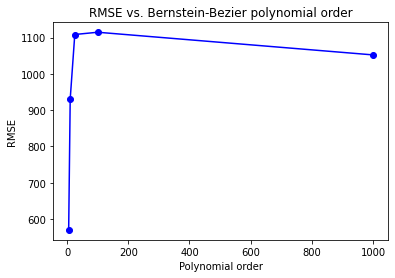

In [1]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from Crypto.Cipher import AES

# Define the AES encryption and decryption functions
def encrypt_aes(key, data):
    cipher = AES.new(key, AES.MODE_EAX)
    nonce = cipher.nonce
    ciphertext, tag = cipher.encrypt_and_digest(data)
    return nonce, ciphertext, tag

def decrypt_aes(key, nonce, ciphertext, tag):
    cipher = AES.new(key, AES.MODE_EAX, nonce=nonce)
    plaintext = cipher.decrypt_and_verify(ciphertext, tag)
    return plaintext

# Load ECG wave file
fs, ecg = wav.read('C:\\Users\\pooja\\Desktop\\Cryptography\\sig100.wav')

# Extract the first 10 seconds of the signal from both channels
ecg_10s = ecg[:10*fs, :]

# Define the order of the Bernstein-Bezier polynomial
orders = [5, 10, 25, 100, 1000]

# Normalize the ECG signal to be between -1 and 1 for both channels
ecg_norm = ecg_10s / np.max(np.abs(ecg_10s), axis=0)

# Fit the ECG signal using Bernstein-Bezier polynomial of different orders for both channels
y_fit_list = []
for i, order in enumerate(orders):
    # Define the Bernstein-Bezier polynomial basis
    t = np.linspace(0, 1, len(ecg_norm))
    control_points = np.zeros((len(ecg_norm), 2, 2))
    control_points[:, :, 0] = t.reshape(-1, 1)
    control_points[:, :, 1] = ecg_norm
    for j in range(1, order):
        for k in range(len(control_points) - j):
            control_points[k] = (1 - t[k]) * control_points[k] + t[k] * control_points[k + 1]
    y_fit = control_points[:, :, 1]
    y_fit_list.append(y_fit)

# Encrypt the normalized ECG signal using AES
key = b'secret_key_12345'
nonce, ecg_norm_encrypted, tag = encrypt_aes(key, ecg_norm.tobytes())

# Decrypt the encrypted ECG signal
ecg_norm_decrypted = np.frombuffer(decrypt_aes(key, nonce, ecg_norm_encrypted, tag), dtype=np.float64).reshape(-1, 2)

# Compute the RMSE between the original ECG signal and the fitted signal for each order
rmse_list = []
for y_fit in y_fit_list:
    # Transform the fitted signal back to the original scale
    y_fit_rescaled = y_fit * np.max(np.abs(ecg_10s), axis=0)
    # Compute the RMSE
    rmse = np.sqrt(np.mean((ecg_10s - y_fit_rescaled)**2))
    rmse_list.append(rmse)

# Plot the RMSE vs. order
plt.figure()
plt.plot(orders, rmse_list, 'bo-')
plt.title('RMSE vs. Bernstein-Bezier polynomial order')
plt.xlabel('Polynomial order')
plt.ylabel('RMSE')
plt.savefig("rmse_ecg.png")
plt.show()


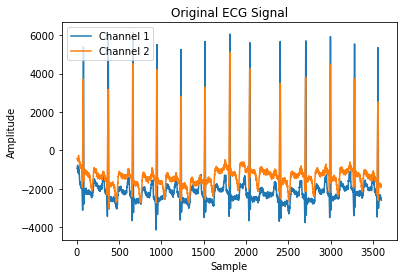

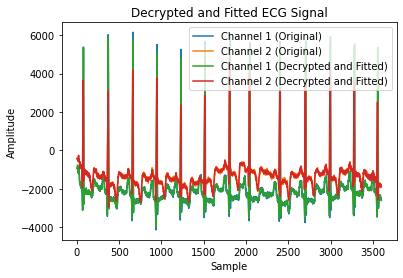

In [13]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from Crypto.Cipher import AES
from sklearn.metrics import mean_squared_error

# Define the AES encryption and decryption functions
def encrypt_aes(key, data):
    cipher = AES.new(key, AES.MODE_EAX)
    nonce = cipher.nonce
    ciphertext, tag = cipher.encrypt_and_digest(data)
    return nonce, ciphertext, tag

def decrypt_aes(key, nonce, ciphertext, tag):
    cipher = AES.new(key, AES.MODE_EAX, nonce=nonce)
    plaintext = cipher.decrypt_and_verify(ciphertext, tag)
    return plaintext

# Load ECG wave file
fs, ecg = wav.read('C:\\Users\\pooja\\Desktop\\Cryptography\\sig100.wav')

# Extract the first 10 seconds of the signal from both channels
ecg_10s = ecg[:10*fs, :]

# Define the order of the Bernstein-Bezier polynomial
order = 5

# Plot the original ECG signal
plt.figure()
plt.plot(ecg_10s[:, 0], label='Channel 1')
plt.plot(ecg_10s[:, 1], label='Channel 2')
plt.title('Original ECG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Normalize the ECG signal to be between -1 and 1 for both channels
ecg_norm = ecg_10s / np.max(np.abs(ecg_10s), axis=0)

# Encrypt the normalized ECG signal using AES
key = b'secret_key_12345'
nonce, ecg_norm_encrypted, tag = encrypt_aes(key, ecg_norm.tobytes())

# Decrypt the encrypted ECG signal
ecg_norm_decrypted = np.frombuffer(decrypt_aes(key, nonce, ecg_norm_encrypted, tag), dtype=np.float64).reshape(-1, 2)

# Fit the decrypted ECG signal using Bernstein-Bezier polynomial of the specified order for both channels
t = np.linspace(0, 1, len(ecg_norm_decrypted))
control_points = np.zeros((len(ecg_norm_decrypted), 2, 2))
control_points[:, :, 0] = t.reshape(-1, 1)
control_points[:, :, 1] = ecg_norm_decrypted
for j in range(1, order):
    for k in range(len(control_points) - j):
        control_points[k] = (1 - t[k]) * control_points[k] + t[k] * control_points[k + 1]

# Convert the fitted signal back to the original scale
ecg_fit = control_points[:, :, 1] * np.max(np.abs(ecg_10s), axis=0)

# Plot the decrypted and fitted ECG signal along with the original ECG signal
plt.figure()
plt.plot(ecg_10s[:, 0], label='Channel 1 (Original)')
plt.plot(ecg_10s[:, 1], label='Channel 2 (Original)')
plt.savefig('ecg1_bezier.png')
plt.plot(ecg_fit[:, 0], label='Channel 1 (Decrypted and Fitted)')
plt.plot(ecg_fit[:, 1], label='Channel 2 (Decrypted and Fitted)')
plt.title('Decrypted and Fitted ECG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.savefig('ecg2_bezier.png')
plt.legend()
plt.show()




In [14]:
# Decrypt the encrypted ECG signal
ecg_norm_decrypted = np.frombuffer(decrypt_aes(key, nonce, ecg_norm_encrypted, tag), dtype=np.float64).reshape(-1, 2)

# Define the Bernstein-Bezier polynomial basis for both channels
t = np.linspace(0, 1, len(ecg_norm_decrypted))
control_points = np.zeros((len(ecg_norm_decrypted), 2, 2))
control_points[:, :, 0] = t.reshape(-1, 1)
control_points[:, :, 1] = ecg_norm_decrypted
for j in range(1, order):
    for k in range(len(control_points) - j):
        control_points[k] = (1 - t[k]) * control_points[k] + t[k] * control_points[k + 1]
y_fit = control_points[:, :, 1]

# Reshape the decrypted signal to the original shape
ecg_norm_decrypted = ecg_norm_decrypted.reshape(-1, 2)

# Compute RMSE for both channels
rmse_ch1 = np.sqrt(np.mean((ecg_norm[:, 0] - y_fit[:, 0])**2))
rmse_ch2 = np.sqrt(np.mean((ecg_norm[:, 1] - y_fit[:, 1])**2))
rmse = (rmse_ch1 + rmse_ch2) / 2

print('RMSE:', rmse)


RMSE: 0.09802483581996055


EVALUATION OF THE BERNSTEIN POLYNOMIAL

In [10]:
import numpy as np
from PIL import Image
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from scipy.stats import pearsonr

# Load the PNG images
img1 = Image.open('ecg1.png')
img2 = Image.open('ecg3.png')

# Convert the PNG images to numpy arrays
img1_arr = np.array(img1)
img2_arr = np.array(img2)

# Calculate the PSNR between the two PNG images
psnr = peak_signal_noise_ratio(img1_arr, img2_arr)

# Calculate the correlation coefficient between the two PNG images
corr_coef, _ = pearsonr(img1_arr.flatten(), img2_arr.flatten())

# Calculate the SSIM between the two PNG images
ssim = structural_similarity(img1_arr, img2_arr, multichannel=True)

# Calculate the PSNR between the two sets of ECG numerical values
psnr_ecg = peak_signal_noise_ratio(ecg_10s, y_dec)

# Calculate the correlation coefficient between the two sets of ECG numerical values
corr_coef_ecg, _ = pearsonr(ecg_10s.flatten(), y_dec.flatten())

# Print the results
print("PSNR (PNG images):", psnr)
print("Correlation coefficient (PNG images):", corr_coef)
print("SSIM (PNG images):", ssim)
print("PSNR (ECG numerical values):", psnr_ecg)
print("Correlation coefficient (ECG numerical values):", corr_coef_ecg)

PSNR (PNG images): 20.5149939622388
Correlation coefficient (PNG images): 0.9637612640061087
SSIM (PNG images): 0.95661112018648
PSNR (ECG numerical values): 39.458245997522184
Correlation coefficient (ECG numerical values): 0.7296351497785561


C:\Users\pooja\AppData\Local\Temp\ipykernel_15556\849739959.py:21: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim = structural_similarity(img1_arr, img2_arr, multichannel=True)
C:\Users\pooja\AppData\Local\Temp\ipykernel_15556\849739959.py:24: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_ecg = peak_signal_noise_ratio(ecg_10s, y_dec)


EVALUATION METRICS FOR BEZIER-BERNSTEIN MODELLED ECG

In [8]:
import numpy as np
from PIL import Image
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from scipy.stats import pearsonr

# Load the PNG images
img1 = Image.open('ecg1_bezier.png')
img2 = Image.open('ecg2_bezier.png')

# Convert the PNG images to numpy arrays
img1_arr = np.array(img1)
img2_arr = np.array(img2)

# Calculate the PSNR between the two PNG images
psnr = peak_signal_noise_ratio(img1_arr, img2_arr)

# Calculate the correlation coefficient between the two PNG images
corr_coef, _ = pearsonr(img1_arr.flatten(), img2_arr.flatten())

# Calculate the SSIM between the two PNG images
ssim = structural_similarity(img1_arr, img2_arr, multichannel=True)

# Calculate the PSNR between the two sets of ECG numerical values
psnr_ecg = peak_signal_noise_ratio(ecg_10s, ecg_fit)

# Calculate the correlation coefficient between the two sets of ECG numerical values
corr_coef_ecg, _ = pearsonr(ecg_10s.flatten(), ecg_fit.flatten())

# Print the results
print("PSNR (PNG images):", psnr)
print("Correlation coefficient (PNG images):", corr_coef)
print("SSIM (PNG images):", ssim)
print("PSNR (ECG numerical values):", psnr_ecg)
print("Correlation coefficient (ECG numerical values):", corr_coef_ecg)


PSNR (PNG images): 18.69030424311442
Correlation coefficient (PNG images): 0.9452186537508164
SSIM (PNG images): 0.9330695608928878
PSNR (ECG numerical values): 41.20753048534682
Correlation coefficient (ECG numerical values): 0.8402375178600895


C:\Users\pooja\AppData\Local\Temp\ipykernel_16172\489538418.py:21: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim = structural_similarity(img1_arr, img2_arr, multichannel=True)
C:\Users\pooja\AppData\Local\Temp\ipykernel_16172\489538418.py:24: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_ecg = peak_signal_noise_ratio(ecg_10s, ecg_fit)
